# Driving in Circles

AutomotiveDrivingModels is templated to efficiently run different types of simulations.
Entities are parameterized by their:

- *S* state, which changes over time
- *D* defintion, which does not change over time
- *I* id, typically an `Int`, which uniquely identifies that entity.

In addition to these types, the actions, environment and the driver models can also be parameterized.

This notebook demonstrates a 2D driving simulation where cars drive in a multi-lane stadium.
The types are:

- *S* - `VehicleState`, containing both the global and lane-relative position, and speed
- *D* - `VehicleDef`, containing length, width, and class
- *I* - `Int`

We use a `Roadway` as our environment. The `Roadway` type is based on the RNDF format.

In [1]:
using AutomotiveDrivingModels
using AutoViz

We generate a 3-lane stadium roadway:

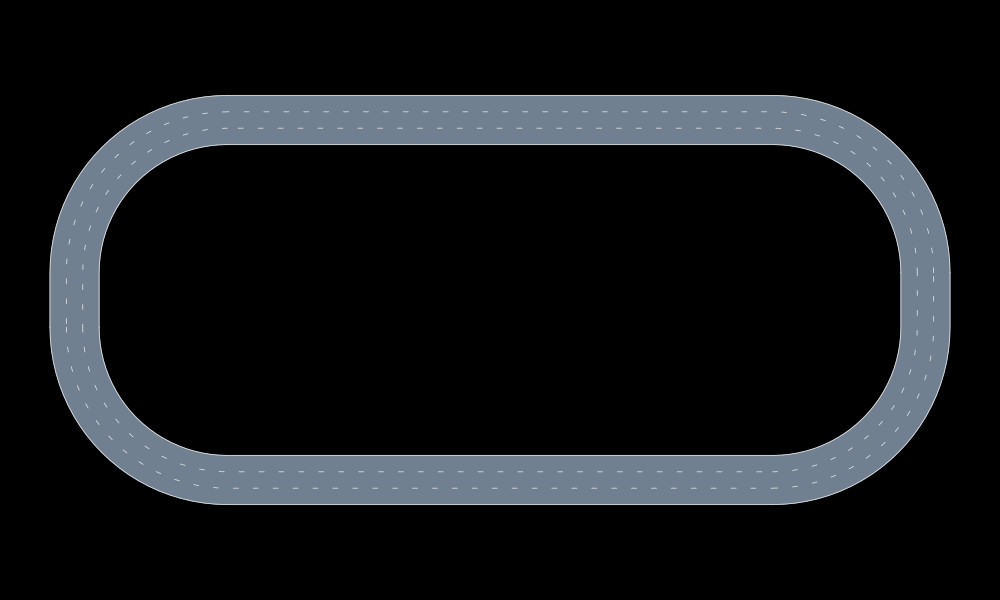

In [2]:
roadway = gen_stadium_roadway(3)

Let's populate a scene.

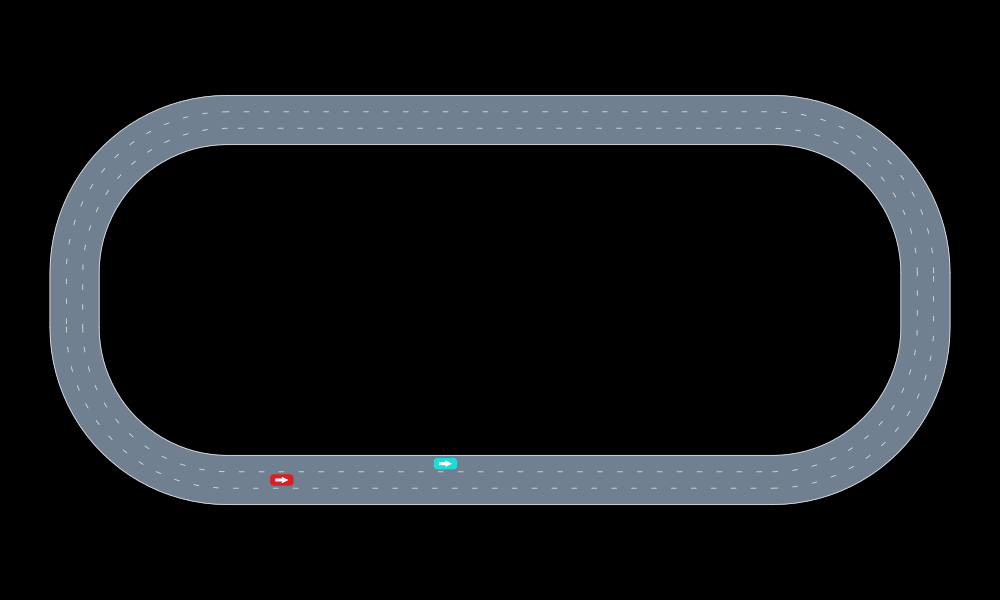

In [15]:
scene = Scene()
push!(scene,Vehicle(VehicleState(VecSE2(10.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 29.0), VehicleDef(), 1))
push!(scene,Vehicle(VehicleState(VecSE2(40.0,0.0,0.0), roadway, 22.0), VehicleDef(), 2))

car_colors = get_pastel_car_colors(scene)
cam = FitToContentCamera()
render(scene, roadway, cam=cam, car_colors=car_colors)

Let's assign driver models.

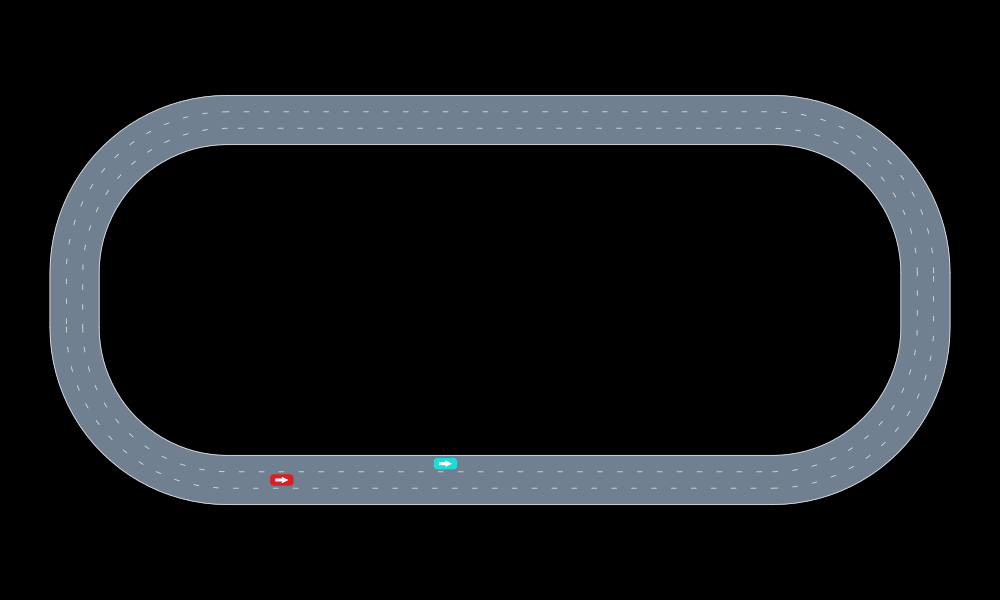

In [16]:
timestep = 0.1

models = Dict{Int, DriverModel}()
models[1] = LatLonSeparableDriver( # produces LatLonAccels
        ProportionalLaneTracker(), # lateral model
        IntelligentDriverModel(), # longitudinal model
)
models[2] = Tim2DDriver(timestep,
        mlane = MOBIL(timestep),
    )

set_desired_speed!(models[1], 12.0)
set_desired_speed!(models[2], 10.0)

nticks = 200
# rec = SceneRecord(nticks+1, timestep)
rec = simulate!(scene, roadway, models, nticks, timestep)
render(rec[1], roadway, cam=cam, car_colors=car_colors)

We can use interact to inspect the simulation record. Note that the static driver just drives off the road.

Interact.Options{:SelectionSlider,Any}(9: "input-3" = 101 Any , "frame_index", 101, "101", 101, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(11, "11"),Pair{Any,Any}(134, "134"),Pair{Any,Any}(158, "158"),Pair{Any,Any}(160, "160"),Pair{Any,Any}(29, "29"),Pair{Any,Any}(131, "131"),Pair{Any,Any}(173, "173"),Pair{Any,Any}(74, "74"),Pair{Any,Any}(201, "201"),Pair{Any,Any}(176, "176")…)), Any[], Any[], true, "horizontal")

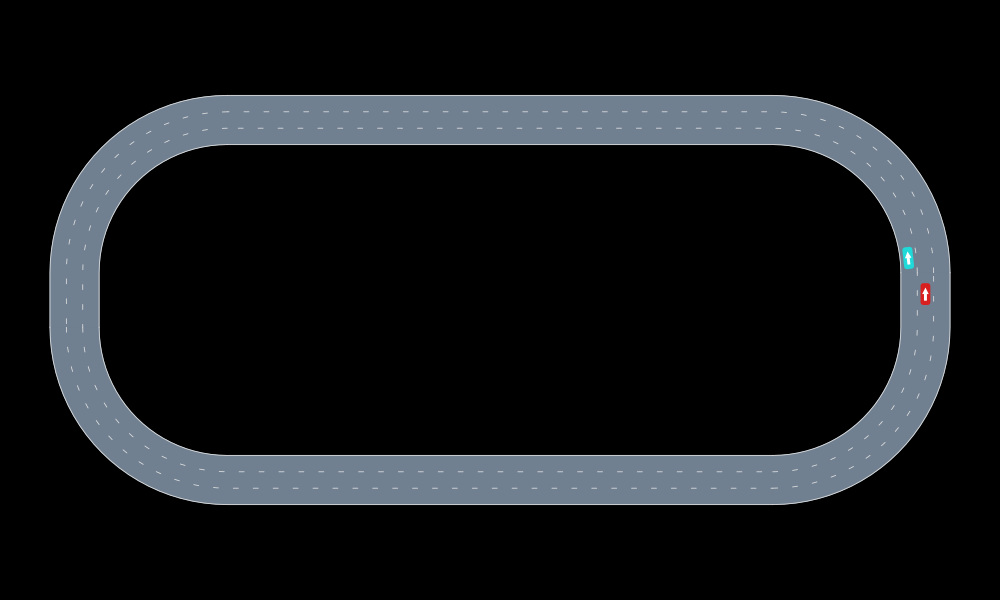

In [17]:
using Interact
@manipulate for frame_index in 1 : length(rec)
    render(rec[frame_index], roadway, cam=cam, car_colors=car_colors)
end

We can save the run to a text file. We achieve this by first converting the the `Trajdata` type and then exporting that.

In [18]:
listrec = convert(Trajdata, rec)
open("2Dstadium_listrec.txt", "w") do io
    write(io, MIME"text/plain"(), listrec)
end

LoadError: [91mMethodError: Cannot `convert` an object of type Array{Records.Frame{Records.Entity{AutomotiveDrivingModels.VehicleState,AutomotiveDrivingModels.VehicleDef,Int64}},1} to an object of type Records.ListRecord{AutomotiveDrivingModels.VehicleState,AutomotiveDrivingModels.VehicleDef,Int64}
This may have arisen from a call to the constructor Records.ListRecord{AutomotiveDrivingModels.VehicleState,AutomotiveDrivingModels.VehicleDef,Int64}(...),
since type constructors fall back to convert methods.[39m

The file can be loaded in a similar way.

In [19]:
listrec2 = open("2Dstadium_listrec.txt", "r") do io
    read(io, MIME"text/plain"(), Trajdata)
end

LoadError: [91mSystemError: opening file 2Dstadium_listrec.txt: No such file or directory[39m